In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [3]:
data = datasets.load_wine()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
target = data['target']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

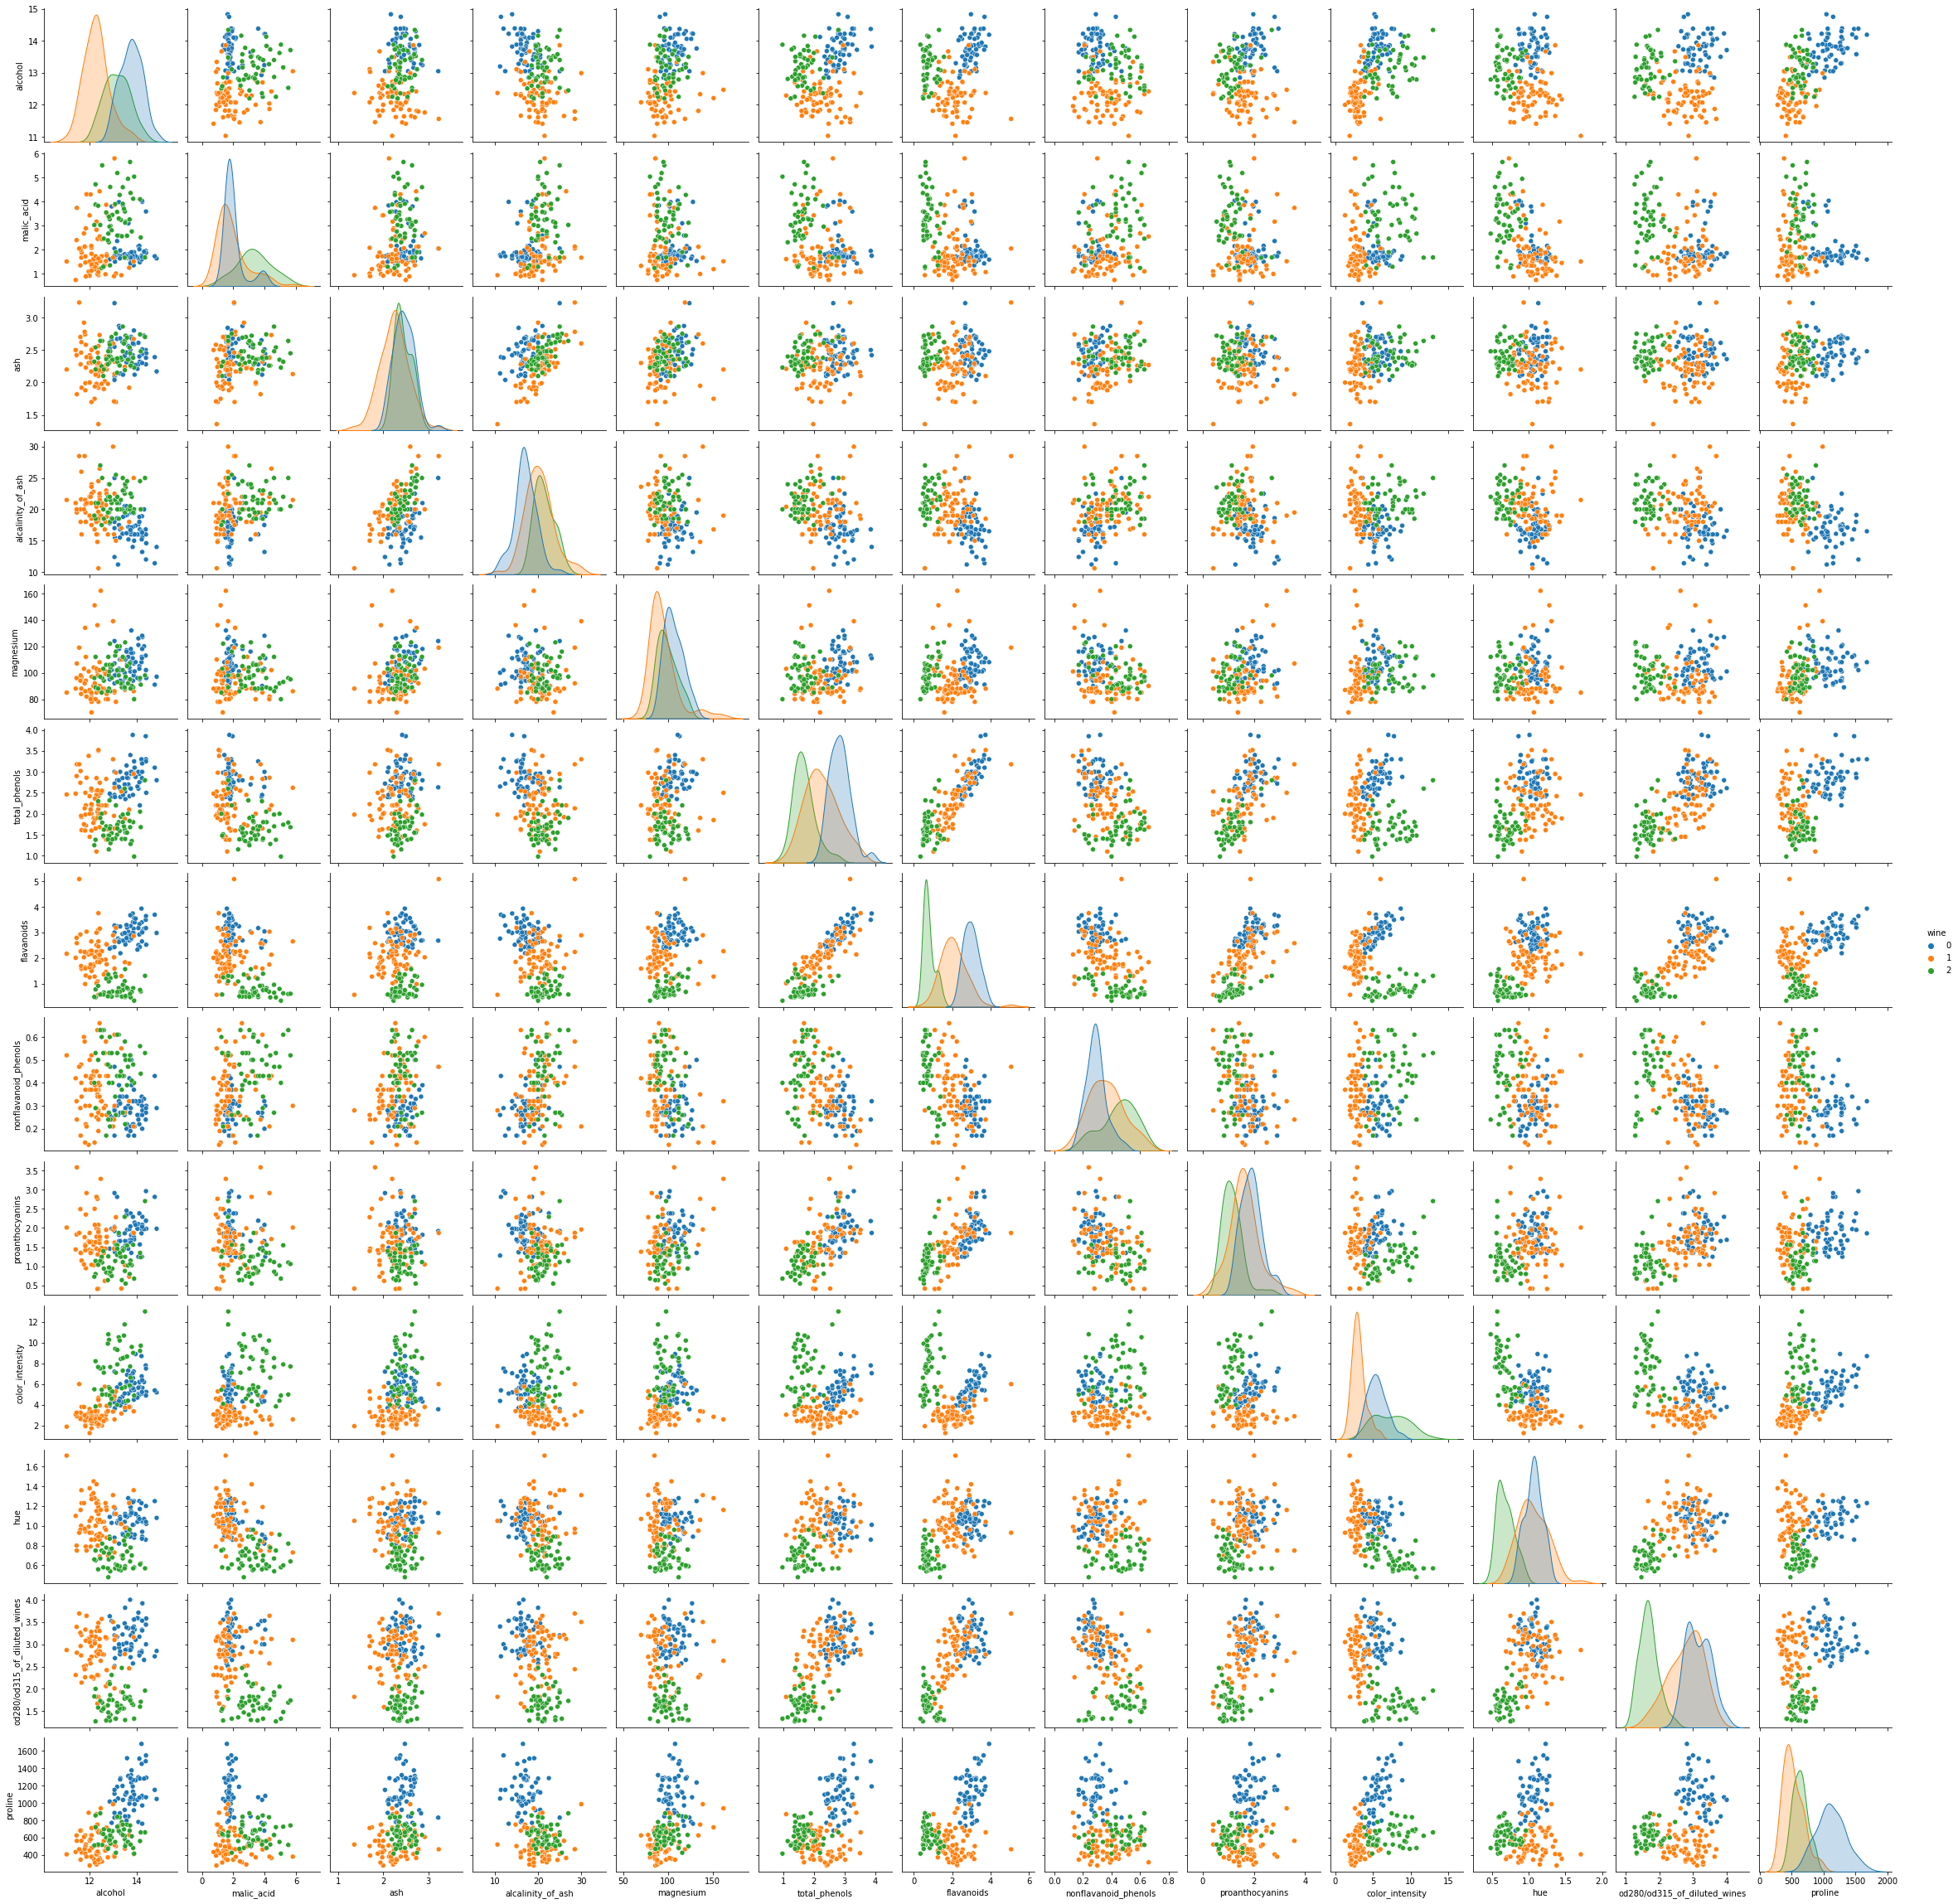

In [18]:
import seaborn as sns
sns.pairplot(df.join(pd.DataFrame(target, columns=['wine'], dtype=str)), hue='wine')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=61)

In [5]:
print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)

X_train :  (142, 13)
y_train :  (142,)
X_test :  (36, 13)
y_test :  (36,)


In [6]:
transformer = ColumnTransformer(transformers=[
    ('trf1', MinMaxScaler(), slice(0,13))
])

In [7]:
X_train_n = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [8]:
model = Sequential(
    [
        tf.keras.Input(shape=(13, )),
        Dense(5, activation='relu', name='layer1'),
        Dense(4, activation='relu', name='layer2'),
        Dense(3, activation='linear', name='layer3'),
    ]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 70        
                                                                 
 layer2 (Dense)              (None, 4)                 24        
                                                                 
 layer3 (Dense)              (None, 3)                 15        
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)
model.fit(
    X_train_n, y_train,
    epochs=10
)

Epoch 1/10
5/5 [==============================] - 4s 30ms/step - loss: 1.1213
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0408
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.9821
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9165
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.8551
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.8053
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.7614
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.7237
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6818
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6406


In [11]:
y_hat = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [13]:
result = tf.nn.softmax(y_hat)

In [14]:
y_pred = []
for ele in result:
    y_pred.append(np.argmax(ele))

In [15]:
from sklearn.metrics import accuracy_score
print(f"The accuracy of the model is {accuracy_score(y_test, y_pred)*100:.3f}%")

The accuracy of the model is 97.222%
